In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
df = pd.read_csv('data/mod1.csv')
df

,name_patient,id_patient,date_examination,group_separation,age_patient,diagnosis_primary,side,satus_reproductive,complaints,breast_surgery_before,...,abus_category_birads,abus_calcinates,mrsi_data,mrsi_number_nodles,tumor_morphology_structure,cytological_conclusion,degree_malignancy,mutation_brca,tumor_receptors,hist_is_tumor
0,2263,EMC232829,01 11 2022,4,51,9,4,2,1,1,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,921,EMC4164053,02 12 2022,3,34,0,4,1,1,1,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,644,EMC395750,29 11 2022,1,33,3,2,1,5,1,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,0,NaN,0
3,748,EMC4447809,17 04 2023,3,35,9,4,4,1,2,...,5.0,3.0,NaN,NaN,7.0,NaN,2.0,0,4.0,1
4,337,EMC4359772,25 10 2022,2,40,9,4,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789,105,EMC326626,14 02 2023,3,34,4,4,1,1,1,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2790,707,EMC4308341,03 12 2022,1,33,9,4,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2791,1248,EMC4508062,05 11 2022,3,31,3,3,1,1,1,...,3.0,0.0,2.0,3.0,NaN,NaN,NaN,0,NaN,0
2792,2119,EMC4502663,24 01 2023,4,56,10,3,2,1,1,...,3.0,0.0,1.0,3.0,7.0,NaN,2.0,0,9.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2794 entries, 0 to 2793
Data columns (total 70 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name_patient                      2794 non-null   int64  
 1   id_patient                        2794 non-null   object 
 2   date_examination                  2794 non-null   object 
 3   group_separation                  2794 non-null   int64  
 4   age_patient                       2794 non-null   int64  
 5   diagnosis_primary                 2794 non-null   int64  
 6   side                              2794 non-null   int64  
 7   satus_reproductive                2794 non-null   int64  
 8   complaints                        2794 non-null   int64  
 9   breast_surgery_before             2794 non-null   int64  
 10  skin_symptoms                     2794 non-null   int64  
 11  nipple_retraction                 2794 non-null   int64  
 12  nipple

### Работа до 40 лет

In [12]:
df_us = df[['age_patient',
            'diagnosis_primary',
            'side',
            'satus_reproductive',
            'complaints',
            'breast_surgery_before', 
            'skin_symptoms',
            'nipple_retraction', 
            'nipple_release',
            'quadrant', 
            'genetics',
            'hormonal_medications',
            'hist_is_tumor']]
df_us_jn = df_us[df_us['age_patient'] < 40]

In [ ]:
X = df_us_jn.drop('hist_is_tumor', axis=1)
y = df_us_jn['hist_is_tumor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

 

,age_patient,diagnosis_primary,side,satus_reproductive,complaints,breast_surgery_before,skin_symptoms,nipple_retraction,nipple_release,quadrant,genetics,hormonal_medications
1801,35,9,4,1,1,1,1,1,1,0,1,2
821,39,3,1,1,5,1,1,1,1,5,2,2
2284,35,9,2,1,1,1,1,1,1,6,2,2
1330,35,4,4,1,1,1,1,1,1,0,2,2
2784,38,4,4,1,1,1,1,1,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2425,30,3,3,1,5,1,1,1,1,0,1,2
2381,34,3,1,4,1,1,1,1,1,1,1,2
1760,32,5,4,1,1,1,1,1,1,0,1,2
833,23,3,4,4,1,1,1,1,1,0,1,2


In [14]:


rf = RandomForestClassifier(
    n_estimators=500, 
    max_depth=5, 
    max_features=None, 
    bootstrap=True, 
    min_samples_split=5,
    min_samples_leaf=2, 
    random_state=42,
    class_weight=None,
    verbose=1,
    n_jobs=-1
)

In [15]:

rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finis

In [16]:
print(f'rf train accuracy {accuracy_score(y_train, y_pred_train):.3f}')
print(f'fr test accuracy {accuracy_score(y_test, y_pred_test):.3f}')

rf train accuracy 0.993
fr test accuracy 0.997


In [17]:
rf.feature_importances_

array([0.16330994, 0.3561588 , 0.00537404, 0.07035942, 0.06848499,
       0.13892943, 0.        , 0.15612643, 0.        , 0.01988796,
       0.00475797, 0.01661103])

In [18]:
rf2 = RandomForestClassifier(
    n_estimators=500, 
    max_depth=3, 
    max_features=3, 
    bootstrap=True, 
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight=None,
    verbose=1,
    n_jobs=-1
)

In [19]:
rf2.fit(X_train, y_train)
y_pred_train = rf2.predict(X_train)
y_pred_test = rf2.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finis

In [20]:
print(f'rf train accuracy {accuracy_score(y_train, y_pred_train):.3f}')
print(f'fr test accuracy {accuracy_score(y_test, y_pred_test):.3f}')

rf train accuracy 0.969
fr test accuracy 0.967


In [21]:
cv_scores = cross_val_score(rf2, X, y, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 

[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   0.9s


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    2.3s remaining:    1.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 

[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.6s


[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.8s finish

In [30]:
cv_scores

array([0.96710526, 0.97350993, 0.98013245, 0.96688742, 0.96688742,
       0.96688742, 0.98013245, 0.97350993, 0.9602649 , 0.9602649 ])

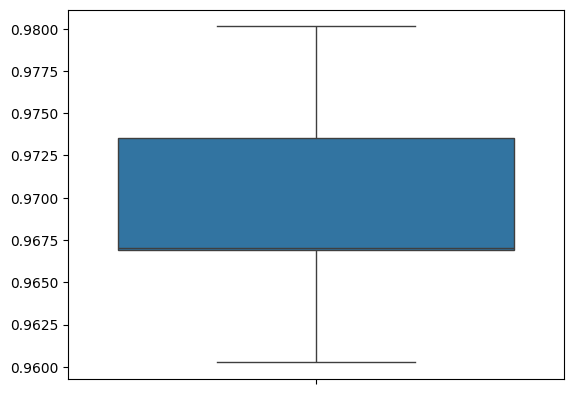

In [23]:
sns.boxplot(cv_scores)
plt.show()

In [24]:
param_grid = {
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [2, 3, 4]
}

rf3 = RandomForestClassifier(n_estimators=500, random_state=42)

grid_search = GridSearchCV(estimator=rf3,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

In [25]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=500,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [26]:
print(grid_search.best_params_)

{'max_depth': 4, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [27]:
print(grid_search.best_score_)

0.9793011213607216


In [48]:
df_us = df[['age_patient',
            'diagnosis_primary',
            'side',
            'satus_reproductive',
            'complaints',
            'breast_surgery_before', 
            'skin_symptoms',
            'nipple_retraction', 
            'nipple_release',
            'quadrant', 
            'genetics',
            'hormonal_medications',
            'mmg_conclusion_skin',
            'mmg_areola',
            'mmg_nipple',
            'mmg_background_breast',
            'mmg_nodle',
            'mmg_nodle_contour',
            'mmg_nodle_size',
            'mmg_calcifications',
            'mmg_number_formations_visualized',
            'mmg_axillary_lymph_nodes',
            'mmg_conclusion',
            'type_structure_acr',
            'mmg_number_nodles',
            'mmg_category_birads',
            'hist_is_tumor']]
df_us_snr = df_us[df_us['age_patient'] >= 40]

In [49]:
X = df_us_snr.drop('hist_is_tumor', axis=1)
y = df_us_snr['hist_is_tumor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


In [50]:
rf = RandomForestClassifier(
    n_estimators=500, 
    max_depth=5, 
    max_features=None, 
    bootstrap=True, 
    min_samples_split=5,
    min_samples_leaf=2, 
    random_state=42,
    class_weight=None,
    verbose=1,
    n_jobs=-1
)

In [51]:
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finis

In [52]:
print(f'rf train accuracy {accuracy_score(y_train, y_pred_train):.3f}')
print(f'fr test accuracy {accuracy_score(y_test, y_pred_test):.3f}')

rf train accuracy 0.986
fr test accuracy 0.988


In [53]:
cv_scores = cross_val_score(rf2, X, y, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 

[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   0.9s


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.5s


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.8s finished


In [54]:
cv_scores

array([0.9379845 , 0.97674419, 0.93023256, 0.921875  , 0.9765625 ,
       0.953125  , 0.9453125 , 0.9453125 , 0.953125  , 0.921875  ])

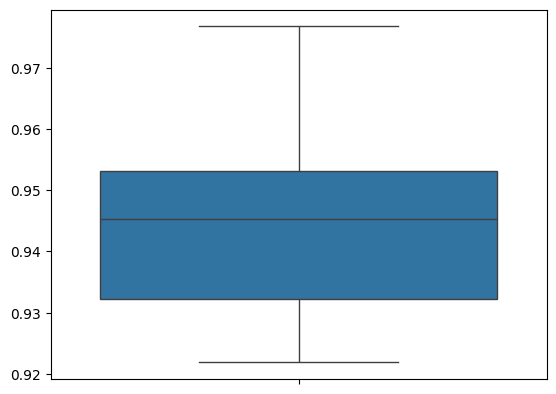

In [55]:
sns.boxplot(cv_scores)
plt.show()

In [56]:
param_grid = {
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [2, 3, 4]
}

rf3 = RandomForestClassifier(n_estimators=500, random_state=42)

grid_search = GridSearchCV(estimator=rf3,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

In [57]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=500,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [58]:
print(grid_search.best_params_)

{'max_depth': 4, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [59]:
print(grid_search.best_score_)

0.9590717499408005
